In [1]:
import numpy as np
import  cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential

In [2]:
IMAGE_SHAPE= (224, 224)

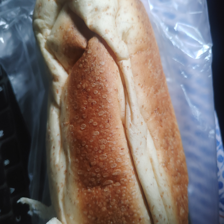

In [3]:
image_path = 'bread.jpeg'
bread_image = Image.open(image_path).resize(IMAGE_SHAPE)
bread_image

In [4]:
# Load the pre-trained MobileNetV2 model from TensorFlow Hub
mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
classifier_model = hub.KerasLayer(mobilenet_v2, input_shape=IMAGE_SHAPE + (3,))

# Create a Sequential model and add the pre-trained model and a Dense layer
classifier = tf.keras.Sequential([
    layers.Lambda(lambda x: classifier_model(x)),
    layers.Dense(12, activation='softmax')
])

# Print the model summary
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Convert the image to a NumPy array
bread_array = np.array(bread_image) / 255.0
bread_array.shape

(224, 224, 3)

In [6]:
# Reshape the NumPy array
bread_array[np.newaxis, ...].shape

(1, 224, 224, 3)

In [7]:
result = classifier.predict(bread_array[np.newaxis, ...])
# Reshape the NumPy array
bread_array[np.newaxis, ...].shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


(1, 12)

In [8]:
predicted_label_index = np.argmax(result)
predicted_label_index

11

In [9]:
image_labels = []
with open("food_class.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['banku', 'beans', 'bread', 'fufu', 'jollof']

In [10]:
image_labels[predicted_label_index]

'yam'

Found 6292 files belonging to 12 classes.
['Banku', 'Beans', 'Bread', 'Fufu', 'Jollof', 'Kenkey', 'Kokonte', 'Plain Rice', 'Plantain', 'Porridge', 'Waakye', 'Yam']


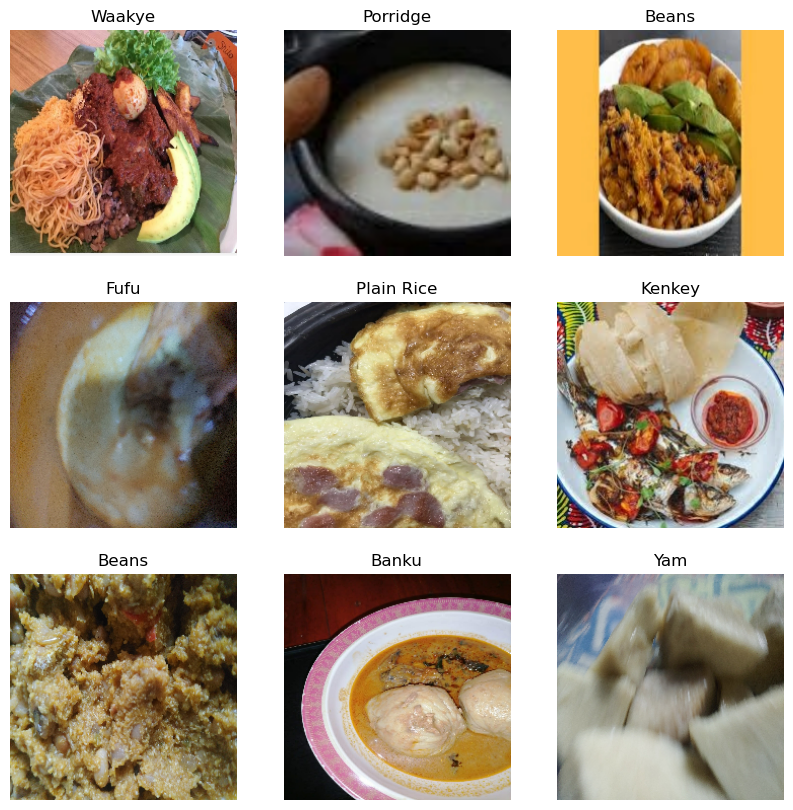

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Set the path to your dataset
data_dir = 'D:/food_dataset'  # Update with your actual path

# Load the dataset
dataset = image_dataset_from_directory(
    data_dir,
    image_size=(224, 224),  # Set the image size to match the model input
    batch_size=18,          # Set the batch size
    label_mode='categorical'  # Use 'categorical' if you have multiple classes
)

# Verify the dataset
class_names = dataset.class_names
print(class_names)

# Plot some sample images from the dataset
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[tf.argmax(labels[i])])
        plt.axis("off")



In [12]:
import pathlib
data_dir = 'D:/food_dataset/Bread'
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('D:/food_dataset/Bread')

In [13]:
import os
import glob

# Define the directory containing the dataset
data_dir = 'D:/food_dataset'  # Update this with your actual path

# List the first five .jpeg files in the dataset directory
jpeg_files = glob.glob(os.path.join(data_dir, '**', '*.jpeg'), recursive=True)[:5]

# Print the paths of the first five .jpeg files
for file in jpeg_files:
    print(file)

D:/food_dataset\Banku\-african-food-two-balls-spicy-sauce-typical-dish-good-dinner-lunch-215604322.jpeg
D:/food_dataset\Banku\1200px-Ghanaian_Banku_cuisine_dish_food.jpeg
D:/food_dataset\Banku\126054251_364930781267593_715183987144198136_n.jpeg
D:/food_dataset\Banku\1493413423_69395.jpeg
D:/food_dataset\Banku\1595337032112.jpeg


In [14]:
import os
import glob

# Define the directory containing the dataset
data_dir = 'D:/food_dataset'  # Update this with your actual path

# Use glob to list all jpeg files in the dataset directory and its subdirectories
jpeg_files = glob.glob(os.path.join(data_dir, '**', '*.jpeg'), recursive=True)

# Count the number of jpeg files
image_count = len(jpeg_files)
print(f"Total number of JPEG files: {image_count}")

Total number of JPEG files: 6292


In [15]:
# Define the path to the yam folder
yam_folder = 'D:/food_dataset/yam'  # Update this path to match your directory structure
#listing the first 5 of yam folder
glob.glob(os.path.join(yam_folder, '*.jp*g'))[:5]


['D:/food_dataset/yam\\130442322_1444610412411481_8858883769605968659_n.jpeg',
 'D:/food_dataset/yam\\20190904052954_IMG_1755-02.jpeg',
 'D:/food_dataset/yam\\20220607_133329.jpeg',
 'D:/food_dataset/yam\\20230528_150937.jpeg',
 'D:/food_dataset/yam\\20230528_150938.jpeg']

In [16]:
food_images_dict = {
    'banku': glob.glob(os.path.join('D:/food_dataset/banku', '*.jp*g')),
    'beans': glob.glob(os.path.join('D:/food_dataset/beans', '*.jp*g')),
    'bread': glob.glob(os.path.join('D:/food_dataset/bread', '*.jp*g')),
     'fufu': glob.glob(os.path.join('D:/food_dataset/fufu', '*.jp*g')),
    'jollof': glob.glob(os.path.join('D:/food_dataset/jollof', '*.jp*g')),
    'kenkey': glob.glob(os.path.join('D:/food_dataset/kenkey', '*.jp*g')),
    'kokonte': glob.glob(os.path.join('D:/food_dataset/kokonte', '*.jp*g')),
    'plain Rice': glob.glob(os.path.join('D:/food_dataset/plain rice', '*.jp*g')),
    'plaintain': glob.glob(os.path.join('D:/food_dataset/plaintain', '*.jp*g')),
    'porridge': glob.glob(os.path.join('D:/food_dataset/porridge', '*.jp*g')),
    'waakye': glob.glob(os.path.join('D:/food_dataset/waakye', '*.jp*g')),
    'yam': glob.glob(os.path.join('D:/food_dataset/yam', '*.jp*g')),
}


In [17]:
food_labels_dict = {
    'banku':0,
    'beans':1,
    'bread':2,
    'fufu':3,
    'jollof':4,
    'kenkey':5,
    'kokonte':6,
    'plain Rice':7,
    'plaintain':8,
    'porridge':9,
    'waakye':10,
    'yam':11,
}
    

In [18]:
str(food_images_dict['kenkey'][1])

'D:/food_dataset/kenkey\\121971939_375209380263942_4514544357447713712_n1.jpeg'

In [19]:
img = cv2.imread(str(food_images_dict['kenkey'][1]))
img.shape

(719, 719, 3)

In [20]:
cv2.resize(img,IMAGE_SHAPE).shape

(224, 224, 3)

In [21]:
X, y = [],[]
for food_name, images in food_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,IMAGE_SHAPE)
        X.append(resized_img)
        y.append(food_labels_dict[food_name])

In [22]:
X = np.array(X)
y = np.array(y)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [24]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

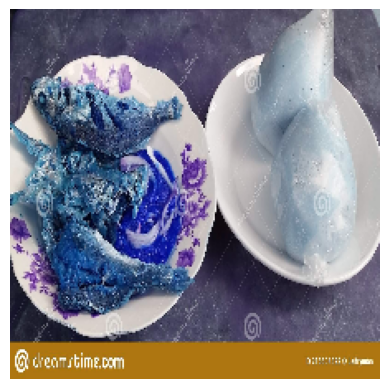

In [25]:
plt.axis('off')
plt.imshow(X[0])

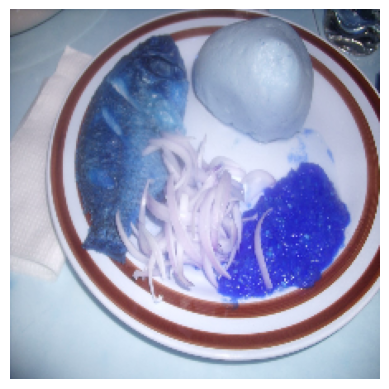

In [26]:
plt.axis('off')
plt.imshow(X[1])

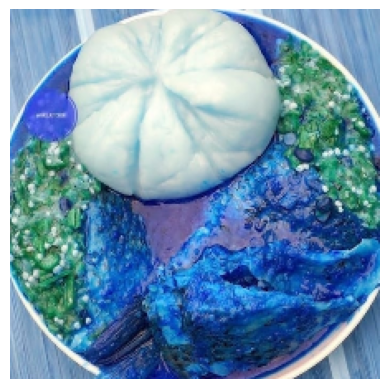

In [27]:
plt.axis('off')
plt.imshow(X[2])

In [28]:
# Assuming X is a list of preprocessed images (each image is already an array of shape (224, 224, 3))
# For example: X = [image1, image2, image3]

# Convert the list of images to a numpy array
X_array = np.array(X)

# Make predictions
predicted = classifier.predict(X_array)

# Get the predicted classes
predicted_classes = np.argmax(predicted, axis=1)

# Print predicted classes
print(predicted_classes)


191/191 ━━━━━━━━━━━━━━━━━━━━ 150s 434ms/step
[11  8  8 ... 11 11  8]


In [29]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer = hub.KerasLayer(feature_extractor_model, input_shape=(224, 224, 3), trainable=False)


In [30]:
num_of_foods = 12
inputs = tf.keras.Input(shape=(224, 224, 3))
pretrained_model_without_top_layer = tf.keras.Model(
    inputs=inputs,
    outputs=tf.keras.layers.Dense(128)(inputs)
)
model = tf.keras.Sequential([
    pretrained_model_without_top_layer,tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_of_foods,activation='softmax')
])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ functional_2 (Functional)       │ ?                      │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 512 (2.00 KB)

 Trainable params: 512 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10


D:\apps\anaconda\Lib\site-packages\keras\src\backend\tensorflow\nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


144/144 ━━━━━━━━━━━━━━━━━━━━ 326s 2s/step - acc: 0.2874 - loss: 210.9839
Epoch 2/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 309s 2s/step - acc: 0.5450 - loss: 13.8231
Epoch 3/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 244s 2s/step - acc: 0.6200 - loss: 8.2944
Epoch 4/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 273s 2s/step - acc: 0.6467 - loss: 6.5698
Epoch 5/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 311s 2s/step - acc: 0.7337 - loss: 3.9030
Epoch 6/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 248s 2s/step - acc: 0.7630 - loss: 2.8716
Epoch 7/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 268s 2s/step - acc: 0.7312 - loss: 4.7030
Epoch 8/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 273s 2s/step - acc: 0.7969 - loss: 2.2834
Epoch 9/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 247s 2s/step - acc: 0.7945 - loss: 2.5413
Epoch 10/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - acc: 0.8539 - loss: 1.3791


In [32]:
model.evaluate(X_test_scaled,y_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 70s 419ms/step - acc: 0.5878 - loss: 9.8821


[10.473136901855469, 0.5776031613349915]